## Create code that processes model output into nice visualizations:

1) The files with daily cases, hospital, deaths counts across all population per districts with format output_workplaceBubblesSophie_ need to be averaged for daily trajectories
2) The files with daily cases, deaths, and in occupation by occupation (occ4) with format output_workplaceBubblesSophie_1_Economic_Status_Covid need to be averaged for daily trajectories
3) The files with daily demographics of cases and deaths by sex and gender

In [7]:
# generic packages
import os
from os.path import isfile, join
import glob
import subprocess
import re

#dataframe packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# plot packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
sns.set(style="darkgrid")

#maps
import geopandas as gpd
import plotly.express as px
import json

occ_input_path= "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_output/d_occupation_case_counts/"
occ_output_path= "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_output/d_occupation_case_counts/plots/"


In [8]:
# # decide which version I am creating graphics for 

# Define the folder path and file prefix
folder_path = occ_input_path


file_prefix = 'output_workplaceBubblesSophie_'
id_prefix='bubblesNorm'

# file_prefix = 'output_perfectMixingSophie_'
# id_prefix="perfMix"


# file_prefix ='output_schoolToHomeSophie_'
# id_prefix = "schoolToHome"

# file_prefix ='output_schoolToComSophie_'
# id_prefix = "schoolToCom"

# file_prefix ='output_comWorkToHomeSophie_'
# id_prefix = "comWorkersToHome"

# file_prefix = 'output_workToHomeSophie_'
# id_prefix = 'workToHome'

# file_prefix = 'output_allToHomeSophie_'
# id_prefix = 'allToHome'

# # # ## mobility scenarios set 
# file_prefix = 'output_BubblesLd_'
# id_prefix = 'bubblesLd'

# file_prefix = 'output_BubblesLd_'
# id_prefix = 'bubblesLdv2'

# file_prefix = 'output_BubblesLd1a_'
# id_prefix = 'bubblesLd_1a'

# file_prefix = 'output_BubblesLd1b_'
# id_prefix = 'bubblesLd_1b'

# file_prefix = 'output_BubblesLd2a_'
# id_prefix = 'bubblesLd_2a'

# file_prefix = 'output_BubblesLd2b_'
# id_prefix = 'bubblesLd_2b'

# file_prefix = 'output_BubblesLd3a_'
# id_prefix = 'bubblesLd_3a'

# file_prefix = 'output_BubblesLd3b_'
# id_prefix = 'bubblesLd_3b'

## 2. Occupation Case Counts compare

In [9]:

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)


# Initialize an empty list to store individual DataFrames
df_list = []

In [10]:


# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[2]
    df['run']=int(run_number)
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
final_df.head()

,day,metric,INFORMAL_PETTY_TRADE,POLICE_ARMY,TRANSPORT_SECTOR,UNEMPLOYED_NOT_AG,SUBSISTENCE_AG,OFFICE_WORKERS,HEALTHCARE_SOCIAL_WORK,STUDENTS_TEACHERS,INACTIVE,AG_ESTATES,MANU_MINING_TRADES,OTHER,SERVICE_RETAIL,RELIGIOUS,Unnamed: 16,run
0,0,number_in_occ,29625,3725,5719,31587,103742,9442,11845,213419,185060,10782,18160,12872,16502,796,NaN,9
1,0,number_with_covid,2,0,0,1,0,0,2,7,2,0,1,1,2,0,NaN,9
2,0,number_died_from_covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,9
3,1,number_in_occ,29625,3725,5719,31587,103742,9442,11845,213419,185060,10782,18160,12872,16502,796,NaN,9
4,1,number_with_covid,0,0,0,0,1,0,0,3,1,0,0,2,6,0,NaN,9


In [11]:
# just keep the number with covid  
r_data=final_df[final_df['metric']== 'number_with_covid']
r_data_pop = final_df[final_df['metric']=='number_in_occ']

#r_data.set_index('day', inplace=True)
r_data.to_csv(occ_output_path+f'{id_prefix}_cases_occ.csv')
r_data_pop.to_csv(occ_output_path+f'{id_prefix}_tots_occ.csv')

r_data.head()
r_data_pop.head()


,day,metric,INFORMAL_PETTY_TRADE,POLICE_ARMY,TRANSPORT_SECTOR,UNEMPLOYED_NOT_AG,SUBSISTENCE_AG,OFFICE_WORKERS,HEALTHCARE_SOCIAL_WORK,STUDENTS_TEACHERS,INACTIVE,AG_ESTATES,MANU_MINING_TRADES,OTHER,SERVICE_RETAIL,RELIGIOUS,Unnamed: 16,run
0,0,number_in_occ,29625,3725,5719,31587,103742,9442,11845,213419,185060,10782,18160,12872,16502,796,NaN,9
3,1,number_in_occ,29625,3725,5719,31587,103742,9442,11845,213419,185060,10782,18160,12872,16502,796,NaN,9
6,2,number_in_occ,29625,3725,5719,31587,103741,9442,11845,213418,185060,10782,18160,12872,16502,796,NaN,9
9,3,number_in_occ,29625,3725,5719,31587,103741,9442,11845,213418,185060,10782,18160,12872,16502,796,NaN,9
12,4,number_in_occ,29625,3725,5719,31587,103741,9442,11845,213418,185060,10782,18160,12872,16502,796,NaN,9


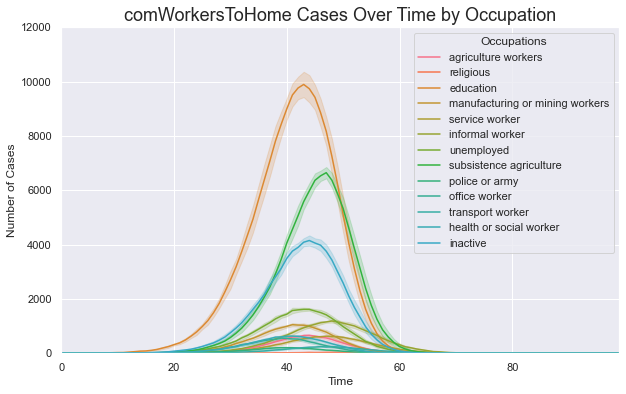

In [1105]:
# make the plots without melting occs into one column  

sns.set_palette(sns.color_palette("husl",20))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
# Plotting the data
plt.figure(figsize=(10, 6))

sns.lineplot(data=r_data, x="day", y="AG_ESTATES", ci='sd', label="agriculture workers") 
sns.lineplot(data=r_data, x="day", y="RELIGIOUS", ci='sd', label='religious') 
sns.lineplot(data=r_data, x="day", y="STUDENTS_TEACHERS", ci='sd', label='education') 
sns.lineplot(data=r_data, x="day", y="MANU_MINING_TRADES", ci='sd', label='manufacturing or mining workers')
sns.lineplot(data=r_data, x="day", y="SERVICE_RETAIL", ci='sd', label='service worker') 
sns.lineplot(data=r_data, x="day", y="INFORMAL_PETTY_TRADE", ci='sd', label='informal worker') 
sns.lineplot(data=r_data, x="day", y="UNEMPLOYED_NOT_AG", ci='sd', label='unemployed') 
sns.lineplot(data=r_data, x="day", y="SUBSISTENCE_AG", ci='sd',label='subsistence agriculture') 
sns.lineplot(data=r_data, x="day", y="POLICE_ARMY", ci='sd', label='police or army')
sns.lineplot(data=r_data, x="day", y="OFFICE_WORKERS", ci='sd', label='office worker')
sns.lineplot(data=r_data, x="day", y="TRANSPORT_SECTOR", ci='sd', label='transport worker')
sns.lineplot(data=r_data, x="day", y="HEALTHCARE_SOCIAL_WORK", ci='sd', label='health or social worker')
sns.lineplot(data=r_data, x="day", y="INACTIVE", ci='sd', label='inactive')

# Adding titles and labels
plt.title(f'{id_prefix} Cases Over Time by Occupation', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.legend(title='Occupations')
plt.xlim(0,99)
plt.ylim(0,12000)
plt.grid(True)

# export the plot 
plt.savefig(occ_output_path+f'{id_prefix}_occ_cases_over_time.png', dpi=300)

## Calculate prevalence of cases per 100,000 people in each occupation

In [1106]:
# create list of just the proportions of people with covid in each occupation 
r_data_t = r_data.transpose().reset_index()
new_header = r_data_t.iloc[0]
r_data_t=r_data_t.drop(r_data_t.index[0:2])
r_data_t.columns=new_header
r_data_t.set_index('day', inplace=True)
# rename index col to reflect the occupation
r_data_t.rename_axis(index ={'day':'occupation'}, inplace=True)

r_data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
occupation,,,,,,,,,,,,,,,,,,,,,
UNEMPLOYED_NOT_AG,0,4,1,1,1,1,2,1,2,3,...,0,0,0,0,0,0,0,0,0,0
POLICE_ARMY,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
SERVICE_RETAIL,0,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
INFORMAL_PETTY_TRADE,0,1,1,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
SUBSISTENCE_AG,0,0,0,0,1,1,1,0,3,2,...,0,0,0,0,0,0,0,0,0,0


In [1107]:
# combine the two datasets and make each the proportion of the population for each day 

comb_prop_occ=pd.merge(r_data, r_data_pop, on =['day','run'], how='outer', suffixes=('_c', '_tot'), indicator=True)
merge_counts = comb_prop_occ['_merge'].value_counts()
print(merge_counts)

comb_prop_occ= comb_prop_occ.drop(columns=['Unnamed: 16_tot', '_merge', 'metric_c'])
comb_prop_occ.to_csv(occ_output_path+f'{id_prefix}_prop_test_occ.csv')
## looks fine 1000 obs means 10 runs, so good. 
comb_prop_occ.head()

_merge
both          1000
left_only        0
right_only       0
Name: count, dtype: int64


,day,UNEMPLOYED_NOT_AG_c,POLICE_ARMY_c,SERVICE_RETAIL_c,INFORMAL_PETTY_TRADE_c,SUBSISTENCE_AG_c,OFFICE_WORKERS_c,HEALTHCARE_SOCIAL_WORK_c,INACTIVE_c,STUDENTS_TEACHERS_c,...,SUBSISTENCE_AG_tot,OFFICE_WORKERS_tot,HEALTHCARE_SOCIAL_WORK_tot,INACTIVE_tot,STUDENTS_TEACHERS_tot,RELIGIOUS_tot,AG_ESTATES_tot,MANU_MINING_TRADES_tot,OTHER_tot,TRANSPORT_SECTOR_tot
0,0,0,0,0,0,0,0,0,5,7,...,103742,9442,11845,185060,213419,796,10782,18160,12872,5719
1,1,4,0,1,1,0,0,0,2,1,...,103742,9442,11845,185060,213419,796,10782,18160,12872,5719
2,2,1,0,0,1,0,0,0,0,5,...,103742,9442,11845,185060,213419,796,10782,18160,12872,5719
3,3,1,0,1,0,0,0,0,0,9,...,103742,9442,11845,185059,213419,796,10782,18160,12872,5719
4,4,1,0,1,0,1,0,0,1,7,...,103742,9442,11845,185059,213418,796,10782,18160,12871,5719


In [1108]:
# Identify columns with _c and _tot suffixes
c_columns = [col for col in comb_prop_occ.columns if col.endswith('_c')]
tot_columns = [col for col in comb_prop_occ.columns if col.endswith('_tot')]

# Create new columns by dividing _c columns by corresponding _tot columns
for c_col in c_columns:
    tot_col = c_col.replace('_c', '_tot')
    if tot_col in comb_prop_occ.columns:
        new_col = c_col.replace('_c', '_perc')
        comb_prop_occ[new_col] = (comb_prop_occ[c_col] /  (comb_prop_occ[tot_col] * 100)) *100000  #this is cases per 100 days per 100,000 people

# Drop the original _c and _tot columns
columns_to_drop = c_columns + tot_columns
comb_prop_occ = comb_prop_occ.drop(columns=columns_to_drop)

comb_prop_occ.head()

,day,run,UNEMPLOYED_NOT_AG_perc,POLICE_ARMY_perc,SERVICE_RETAIL_perc,INFORMAL_PETTY_TRADE_perc,SUBSISTENCE_AG_perc,OFFICE_WORKERS_perc,HEALTHCARE_SOCIAL_WORK_perc,INACTIVE_perc,STUDENTS_TEACHERS_perc,RELIGIOUS_perc,AG_ESTATES_perc,MANU_MINING_TRADES_perc,OTHER_perc,TRANSPORT_SECTOR_perc
0,0,8,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.027018,0.032799,0.0,0.092747,0.055066,0.155376,0.174856
1,1,8,0.126634,0.0,0.060599,0.033755,0.000000,0.0,0.0,0.010807,0.004686,0.0,0.000000,0.000000,0.077688,0.000000
2,2,8,0.031659,0.0,0.000000,0.033755,0.000000,0.0,0.0,0.000000,0.023428,0.0,0.000000,0.000000,0.077688,0.000000
3,3,8,0.031659,0.0,0.060599,0.000000,0.000000,0.0,0.0,0.000000,0.042171,0.0,0.000000,0.055066,0.000000,0.000000
4,4,8,0.031659,0.0,0.060599,0.000000,0.009639,0.0,0.0,0.005404,0.032799,0.0,0.092747,0.110132,0.000000,0.000000


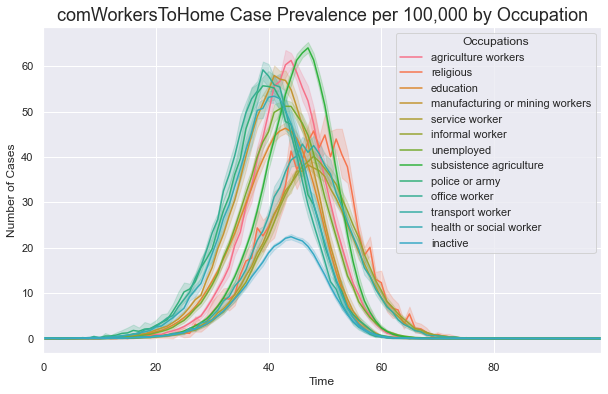

In [1109]:


sns.set_palette(sns.color_palette("husl",20))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
# Plotting the data
plt.figure(figsize=(10, 6))

sns.lineplot(data=comb_prop_occ, x="day", y="AG_ESTATES_perc", label="agriculture workers") 
sns.lineplot(data=comb_prop_occ, x="day", y="RELIGIOUS_perc",  label='religious') 
sns.lineplot(data=comb_prop_occ, x="day", y="STUDENTS_TEACHERS_perc",label='education') 
sns.lineplot(data=comb_prop_occ, x="day", y="MANU_MINING_TRADES_perc", label='manufacturing or mining workers')
sns.lineplot(data=comb_prop_occ, x="day", y="SERVICE_RETAIL_perc",  label='service worker') 
sns.lineplot(data=comb_prop_occ, x="day", y="INFORMAL_PETTY_TRADE_perc", label='informal worker') 
sns.lineplot(data=comb_prop_occ, x="day", y="UNEMPLOYED_NOT_AG_perc", label='unemployed') 
sns.lineplot(data=comb_prop_occ, x="day", y="SUBSISTENCE_AG_perc", label='subsistence agriculture') 
sns.lineplot(data=comb_prop_occ, x="day", y="POLICE_ARMY_perc", label='police or army')
sns.lineplot(data=comb_prop_occ, x="day", y="OFFICE_WORKERS_perc", label='office worker')
sns.lineplot(data=comb_prop_occ, x="day", y="TRANSPORT_SECTOR_perc", label='transport worker')
sns.lineplot(data=comb_prop_occ, x="day", y="HEALTHCARE_SOCIAL_WORK_perc",  label='health or social worker')
sns.lineplot(data=comb_prop_occ, x="day", y="INACTIVE_perc", label='inactive')

# Adding titles and labels
plt.title(f'{id_prefix} Case Prevalence per 100,000 by Occupation', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.legend(title='Occupations')
plt.xlim(0,99)
#plt.ylim(0,5)
plt.grid(True)

# export the plot 
plt.savefig(occ_output_path+f'{id_prefix}_p_occ_cases_over_time.png', dpi=300)

In [1110]:
# make the plots without melting occs into one column  
columns = ['AG_ESTATES', 'RELIGIOUS', 'STUDENTS_TEACHERS', 'MANU_MINING_TRADES','SERVICE_RETAIL', 'INFORMAL_PETTY_TRADE','UNEMPLOYED_NOT_AG','SUBSISTENCE_AG','POLICE_ARMY', 'OFFICE_WORKERS', 'TRANSPORT_SECTOR',
           'HEALTHCARE_SOCIAL_WORK', 'INACTIVE', 'OTHER']

comb_prop_occ=comb_prop_occ.drop(columns=['run'])

# first need to just use averages, because the CIs create too much error 
# Loop over the columns and compute cumulative sums
for col in columns:
    comb_prop_occ[f'{col}_perc'] = comb_prop_occ.groupby(['day'])[f'{col}_perc'].mean()

comb_prop_occ.to_csv(occ_output_path+f'{id_prefix}_av_p_cases_by_occ.csv')
comb_prop_occ.head()

,day,UNEMPLOYED_NOT_AG_perc,POLICE_ARMY_perc,SERVICE_RETAIL_perc,INFORMAL_PETTY_TRADE_perc,SUBSISTENCE_AG_perc,OFFICE_WORKERS_perc,HEALTHCARE_SOCIAL_WORK_perc,INACTIVE_perc,STUDENTS_TEACHERS_perc,RELIGIOUS_perc,AG_ESTATES_perc,MANU_MINING_TRADES_perc,OTHER_perc,TRANSPORT_SECTOR_perc
0,0,0.047488,0.026846,0.042419,0.033755,0.001928,0.031773,0.075981,0.024857,0.029519,0.125628,0.009275,0.044053,0.054382,0.034971
1,1,0.034824,0.026846,0.018180,0.006751,0.004820,0.063546,0.050654,0.004323,0.014994,0.000000,0.018549,0.022026,0.046613,0.000000
2,2,0.031659,0.053691,0.000000,0.010127,0.007712,0.031773,0.033770,0.009186,0.021085,0.000000,0.009275,0.016520,0.023306,0.017486
3,3,0.012663,0.000000,0.006060,0.003376,0.001928,0.010591,0.016885,0.003242,0.026240,0.000000,0.000000,0.033040,0.007769,0.000000
4,4,0.018995,0.026846,0.018180,0.013502,0.005784,0.052955,0.025327,0.005944,0.025302,0.000000,0.009275,0.027533,0.031075,0.000000


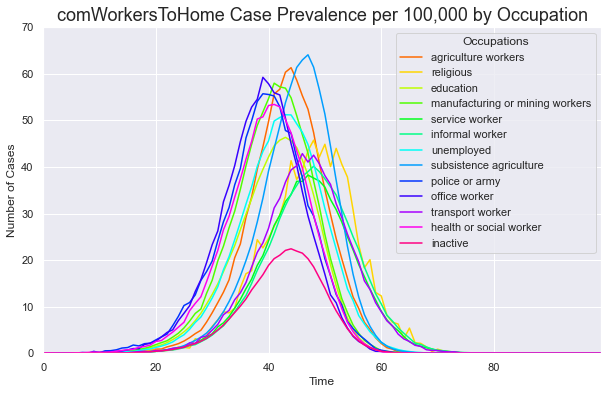

In [1111]:


sns.set_palette(sns.color_palette('hsv',13))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
# Plotting the data
plt.figure(figsize=(10, 6))

sns.lineplot(data=comb_prop_occ, x="day", y="AG_ESTATES_perc", label="agriculture workers") 
sns.lineplot(data=comb_prop_occ, x="day", y="RELIGIOUS_perc",  label='religious') 
sns.lineplot(data=comb_prop_occ, x="day", y="STUDENTS_TEACHERS_perc",label='education') 
sns.lineplot(data=comb_prop_occ, x="day", y="MANU_MINING_TRADES_perc", label='manufacturing or mining workers')
sns.lineplot(data=comb_prop_occ, x="day", y="SERVICE_RETAIL_perc",  label='service worker') 
sns.lineplot(data=comb_prop_occ, x="day", y="INFORMAL_PETTY_TRADE_perc", label='informal worker') 
sns.lineplot(data=comb_prop_occ, x="day", y="UNEMPLOYED_NOT_AG_perc", label='unemployed') 
sns.lineplot(data=comb_prop_occ, x="day", y="SUBSISTENCE_AG_perc", label='subsistence agriculture') 
sns.lineplot(data=comb_prop_occ, x="day", y="POLICE_ARMY_perc", label='police or army')
sns.lineplot(data=comb_prop_occ, x="day", y="OFFICE_WORKERS_perc", label='office worker')
sns.lineplot(data=comb_prop_occ, x="day", y="TRANSPORT_SECTOR_perc", label='transport worker')
sns.lineplot(data=comb_prop_occ, x="day", y="HEALTHCARE_SOCIAL_WORK_perc",  label='health or social worker')
sns.lineplot(data=comb_prop_occ, x="day", y="INACTIVE_perc", label='inactive')

# Adding titles and labels
plt.title(f'{id_prefix} Case Prevalence per 100,000 by Occupation', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.legend(title='Occupations')
plt.xlim(0,99)
plt.ylim(0,70)
plt.grid(True)

# export the plot 
plt.savefig(occ_output_path+f'{id_prefix}_av_p_occ_cases.png', dpi=300)

## 3. Deaths by occupation

In [1112]:
# create another one which is number who died from covid  in each occ 

r_data=final_df[final_df['metric']== 'number_died_from_covid']
r_data.set_index('day', inplace=True)
r_data.to_csv(occ_output_path+f'{id_prefix}_test.csv')
r_data.head()

,metric,UNEMPLOYED_NOT_AG,POLICE_ARMY,SERVICE_RETAIL,INFORMAL_PETTY_TRADE,SUBSISTENCE_AG,OFFICE_WORKERS,HEALTHCARE_SOCIAL_WORK,INACTIVE,STUDENTS_TEACHERS,RELIGIOUS,AG_ESTATES,MANU_MINING_TRADES,OTHER,TRANSPORT_SECTOR,Unnamed: 16,run
day,,,,,,,,,,,,,,,,,
0,number_died_from_covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8
1,number_died_from_covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8
2,number_died_from_covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8
3,number_died_from_covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8
4,number_died_from_covid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8


In [1113]:
columns = ['AG_ESTATES', 'RELIGIOUS', 'STUDENTS_TEACHERS', 'MANU_MINING_TRADES','SERVICE_RETAIL', 'INFORMAL_PETTY_TRADE','UNEMPLOYED_NOT_AG','SUBSISTENCE_AG','POLICE_ARMY', 'OFFICE_WORKERS', 'TRANSPORT_SECTOR',
           'HEALTHCARE_SOCIAL_WORK', 'INACTIVE']

# so I want for within each run, that it will make the cumulative sum of the deaths per occupation, so that way I keep the confidence intervals

# Sort the DataFrame by 'day'
r_data = r_data.sort_values(by=['run','day'])

# Loop over the columns and compute cumulative sums
for column in columns:
    r_data[f'{column}_cum_sum'] = r_data.groupby(['run'])[column].cumsum()
    
r_data.head()
r_data.to_csv(occ_output_path+f'{id_prefix}_test_rdata.csv')

In [1114]:
# now reshape the data across occupations
# Reset the index so 'day' becomes a column

columns = ['AG_ESTATES_cum_sum', 'RELIGIOUS_cum_sum', 'STUDENTS_TEACHERS_cum_sum', 'MANU_MINING_TRADES_cum_sum','SERVICE_RETAIL_cum_sum', 'INFORMAL_PETTY_TRADE_cum_sum','UNEMPLOYED_NOT_AG_cum_sum','SUBSISTENCE_AG_cum_sum','POLICE_ARMY_cum_sum', 'OFFICE_WORKERS_cum_sum', 'TRANSPORT_SECTOR_cum_sum',
           'HEALTHCARE_SOCIAL_WORK_cum_sum', 'INACTIVE_cum_sum']

r_data = r_data.reset_index()
df_melted = pd.melt(r_data, id_vars=['day', 'run'], value_vars=columns, var_name='occupation', value_name='cum_deaths')

# Remove the suffix '_cum_sum' from all values in the 'column_with_suffix'
df_melted['occupation'] = df_melted['occupation'].str.replace('_cum_sum', '', regex=False)


df_melted.to_csv(occ_output_path+f'{id_prefix}_test_cs.csv')
df_melted.head()

,day,run,occupation,cum_deaths
0,0,1,AG_ESTATES,0
1,1,1,AG_ESTATES,0
2,2,1,AG_ESTATES,0
3,3,1,AG_ESTATES,0
4,4,1,AG_ESTATES,0


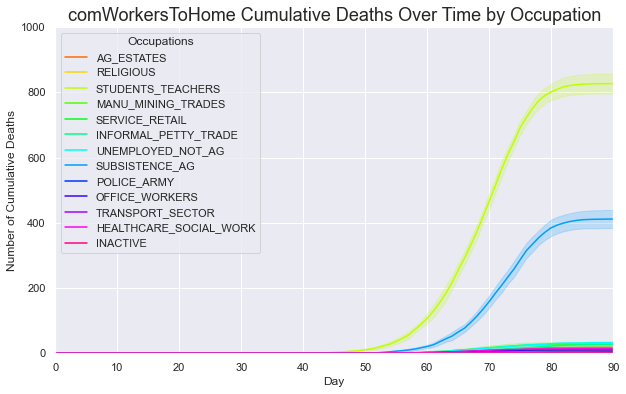

In [1115]:
# Plotting the cumulative deaths by occupation
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_melted, x="day", y="cum_deaths", hue="occupation", ci='sd') 

# Adding titles and labels
plt.title(f'{id_prefix} Cumulative Deaths Over Time by Occupation', size=18)
plt.xlabel('Day')
plt.ylabel('Number of Cumulative Deaths')
plt.legend(title='Occupations')
plt.xlim(0,90)
plt.ylim(0,1000)
plt.grid(True)

# export the plot 
plt.savefig(occ_output_path+f'{id_prefix}_occ_deaths_over_time.png', dpi=300)